# Atividade 01

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
%%time
df = pd.read_csv('./data/online_shoppers_intention.csv')

CPU times: total: 15.6 ms
Wall time: 51.3 ms


In [3]:
%%time
df.head()

CPU times: total: 0 ns
Wall time: 997 µs


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
%%time
df.Revenue.value_counts(dropna=False)

CPU times: total: 0 ns
Wall time: 1e+03 µs


Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
%%time
# Lista de variáveis de interesse
vars_of_interest = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Substitui valores infinitos por NaN
df[vars_of_interest] = df[vars_of_interest].replace([np.inf, -np.inf], np.nan)

# Cria uma tabela para exibir estatísticas descritivas
stats_table = PrettyTable()
stats_table.field_names = ["Statistic"] + vars_of_interest
stats_table.add_rows(df[vars_of_interest].describe().reset_index().values)
print("Estatísticas descritivas:")
print(stats_table)

# Cria uma tabela para exibir valores missing
missing_table = PrettyTable()
missing_table.field_names = ["Variável", "Valores Missing"]
missing_table.add_rows(df[vars_of_interest].isnull().sum().reset_index().values)
print("\nValores missing:")
print(missing_table)

Estatísticas descritivas:
+-----------+--------------------+-------------------------+--------------------+------------------------+--------------------+-------------------------+
| Statistic |   Administrative   | Administrative_Duration |   Informational    | Informational_Duration |   ProductRelated   | ProductRelated_Duration |
+-----------+--------------------+-------------------------+--------------------+------------------------+--------------------+-------------------------+
|   count   |      12330.0       |         12330.0         |      12330.0       |        12330.0         |      12330.0       |         12330.0         |
|    mean   | 2.3151662611516626 |    80.81861053933592    | 0.5035685320356853 |   34.47239792772304    | 31.731467964314678 |    1194.7462199688268   |
|    std    |  3.32178410615674  |    176.77910747048236   | 1.2701564259834865 |   140.74929442219084   | 44.47550330493621  |    1913.6692878719944   |
|    min    |        0.0         |           0.0  

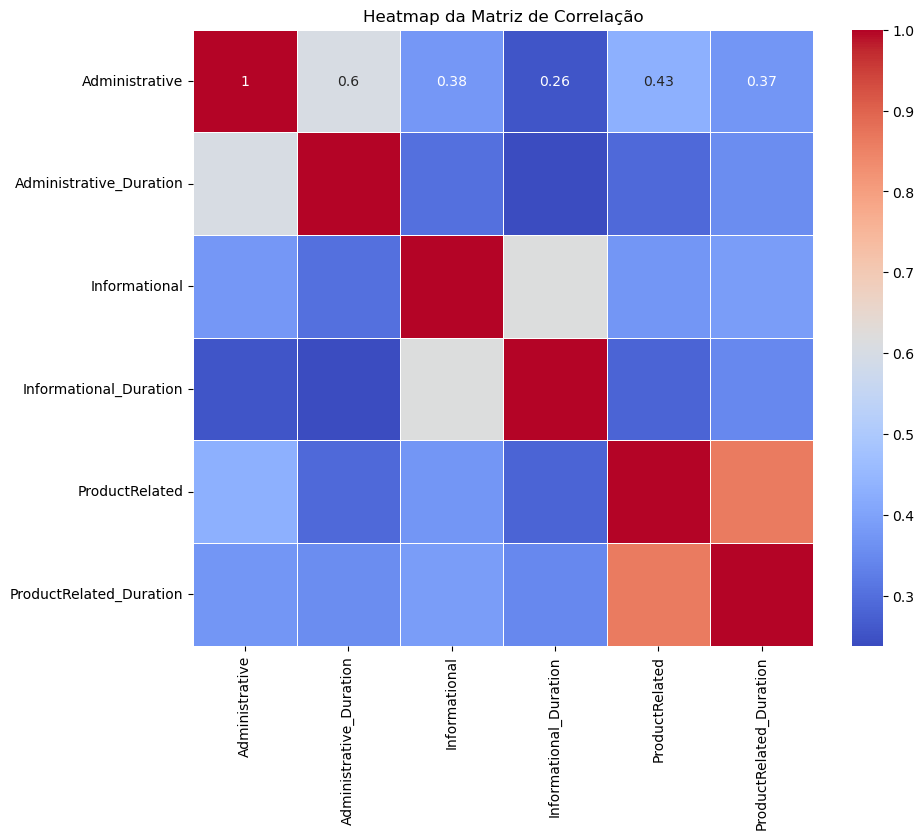

CPU times: total: 109 ms
Wall time: 355 ms


In [6]:
%%time
# Calcula a matriz de correlação
corr_matrix = df[vars_of_interest].corr()

# Cria um heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap da Matriz de Correlação")
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

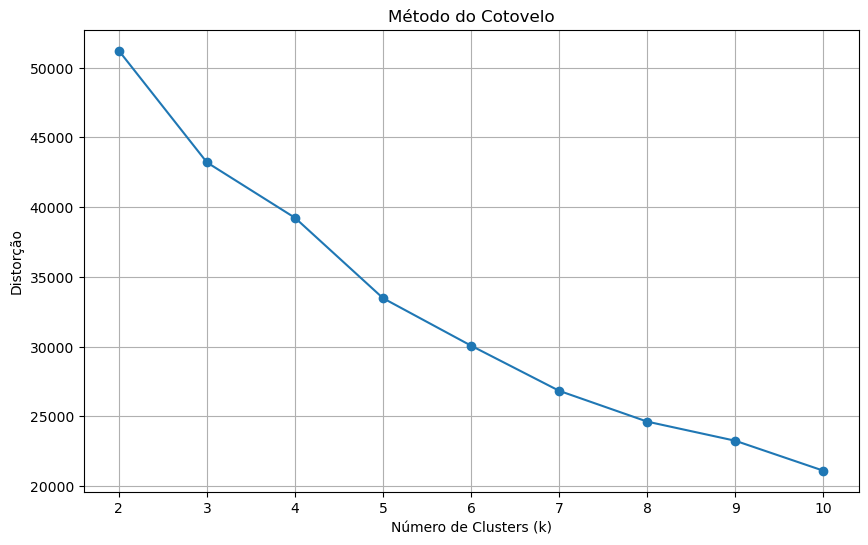

O número ideal de clusters é: 3


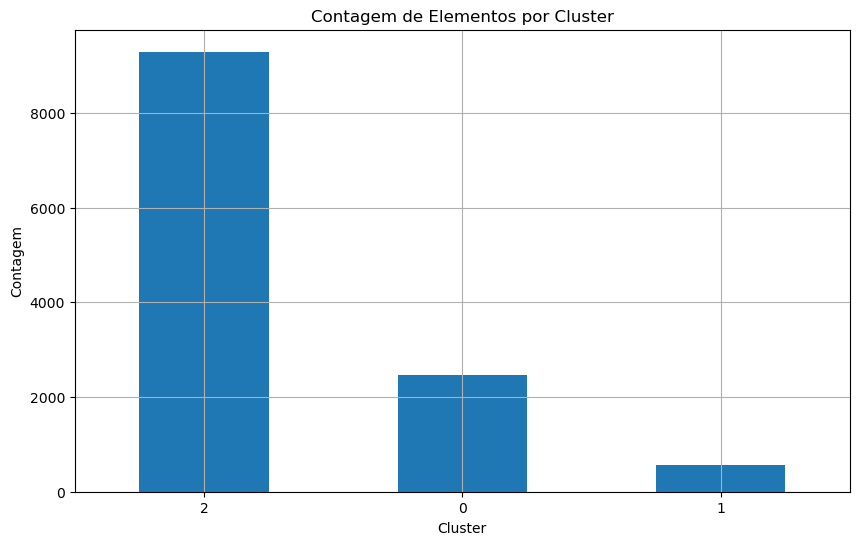

CPU times: total: 3.34 s
Wall time: 1.24 s


In [7]:
%%time
# Selecionar as variáveis de interesse
X = df[['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular a distorção para diferentes números de clusters
k_values = range(2, 11)
distortions = [KMeans(n_clusters=k, random_state=0).fit(X_scaled).inertia_ for k in k_values]

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorção')
plt.title('Método do Cotovelo')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Encontrar o número ideal de clusters
ideal_k = k_values[np.argmax(np.diff(distortions)[::-1] > np.diff(distortions)[::-1].mean()) + 1]
print(f"O número ideal de clusters é: {ideal_k}")

# Aplicar o K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=ideal_k, random_state=0).fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Plotar a contagem de elementos por cluster
plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.title('Contagem de Elementos por Cluster')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.


Análise para k=4 clusters (decisão final):
+---------+-------------------------+---------+---------+---------+--------+---------+---------+---------+----------+
| Cluster |         Variable        |  Count  |   Mean  |   Std   |  Min   |   25%   |   50%   |   75%   |   Max    |
+---------+-------------------------+---------+---------+---------+--------+---------+---------+---------+----------+
|    0    |      Administrative     | 2804.00 |   5.64  |   3.19  |  0.00  |   4.00  |   5.00  |   7.00  |  23.00   |
|    0    | Administrative_Duration | 2804.00 |  161.60 |  122.58 |  0.00  |  70.56  |  134.00 |  224.96 |  630.53  |
|    0    |      Informational      | 2804.00 |   0.93  |   1.27  |  0.00  |   0.00  |   0.00  |   2.00  |   6.00   |
|    0    |  Informational_Duration | 2804.00 |  40.03  |  79.40  |  0.00  |   0.00  |   0.00  |  44.00  |  566.00  |
|    0    |      ProductRelated     | 2804.00 |  53.65  |  40.58  |  1.00  |  24.00  |  42.00  |  73.25  |  282.00  |
|    0    | 

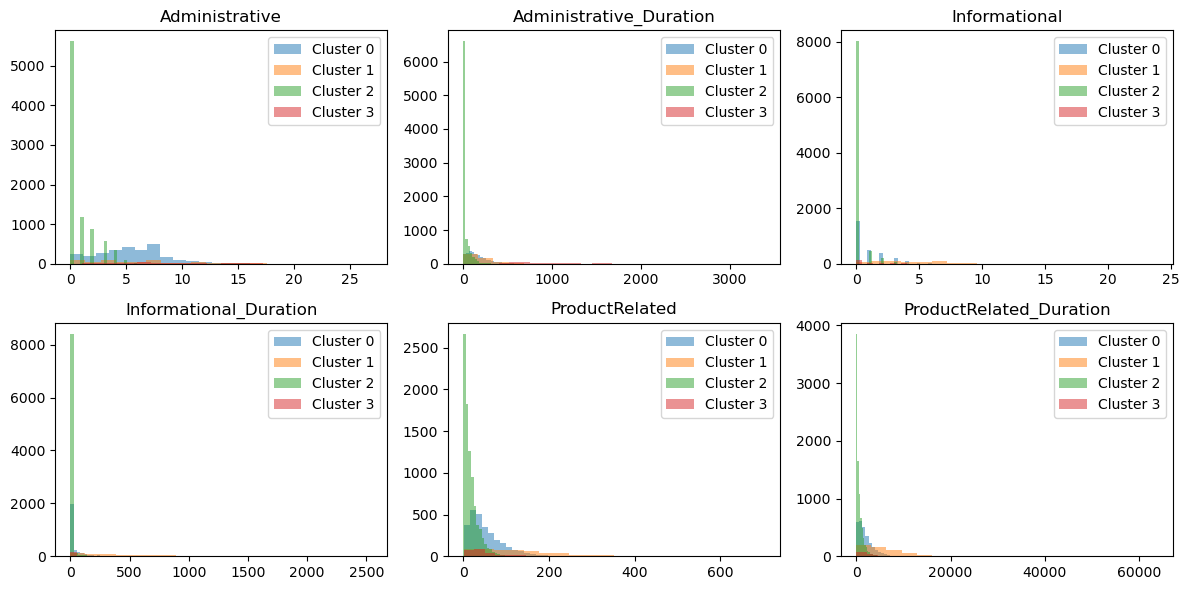

Cluster 0: Navegadores Básicos
Cluster 1: Navegadores Informativos
Cluster 2: Navegadores Produtos
Cluster 3: Navegadores Avançados
CPU times: total: 1.3 s
Wall time: 1.48 s


In [8]:
%%time
# Selecionar as variáveis de interesse
X = df[['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means com 4 clusters (decisão final)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)

# Adicionar os rótulos de cluster ao DataFrame
df['Cluster'] = kmeans.labels_

vars_of_interest = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

print('\nAnálise para k=4 clusters (decisão final):')
table = PrettyTable()
table.field_names = ['Cluster', 'Variable', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
for cluster in range(4):
    for var in vars_of_interest:
        desc = df[df['Cluster'] == cluster][var].describe()
        table.add_row([cluster, var] + [f"{val:.2f}" for val in desc])
print(table)

plt.figure(figsize=(12, 6))
for i, var in enumerate(vars_of_interest):
    plt.subplot(2, 3, i+1)
    for cluster in range(4):
        plt.hist(df[df['Cluster'] == cluster][var], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(var)
    plt.legend()
plt.tight_layout()
plt.show()

# Sugestão de nomes para os grupos
cluster_names = ['Navegadores Básicos', 'Navegadores Informativos', 'Navegadores Produtos', 'Navegadores Avançados']
for i, name in enumerate(cluster_names):
    print(f"Cluster {i}: {name}")

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

Estatísticas descritivas para BounceRates e Revenue por cluster:
+---------+-------------+---------+------+------+------+------+------+------+------+
| Cluster |   Variable  |  Count  | Mean | Std  | Min  | 25%  | 50%  | 75%  | Max  |
+---------+-------------+---------+------+------+------+------+------+------+------+
|    0    | BounceRates | 2804.00 | 0.01 | 0.01 | 0.00 | 0.00 | 0.00 | 0.01 | 0.16 |
|    0    |   Revenue   | 2804.00 | 0.23 | 0.42 | 0.00 | 0.00 | 0.00 | 0.00 | 1.00 |
|    1    | BounceRates |  554.00 | 0.01 | 0.01 | 0.00 | 0.00 | 0.00 | 0.01 | 0.07 |
|    1    |   Revenue   |  554.00 | 0.31 | 0.46 | 0.00 | 0.00 | 0.00 | 1.00 | 1.00 |
|    2    | BounceRates | 8722.00 | 0.03 | 0.06 | 0.00 | 0.00 | 0.00 | 0.03 | 0.20 |
|    2    |   Revenue   | 8722.00 | 0.12 | 0.32 | 0.00 | 0.00 | 0.00 | 0.00 | 1.00 |
|    3    | BounceRates |  250.00 | 0.01 | 0.01 | 0.00 | 0.00 | 0.00 | 0.01 | 0.08 |
|    3    |   Revenue   |  250.00 | 0.24 | 0.43 | 0.00 | 0.00 | 0.00 | 0.00 | 1.00 |


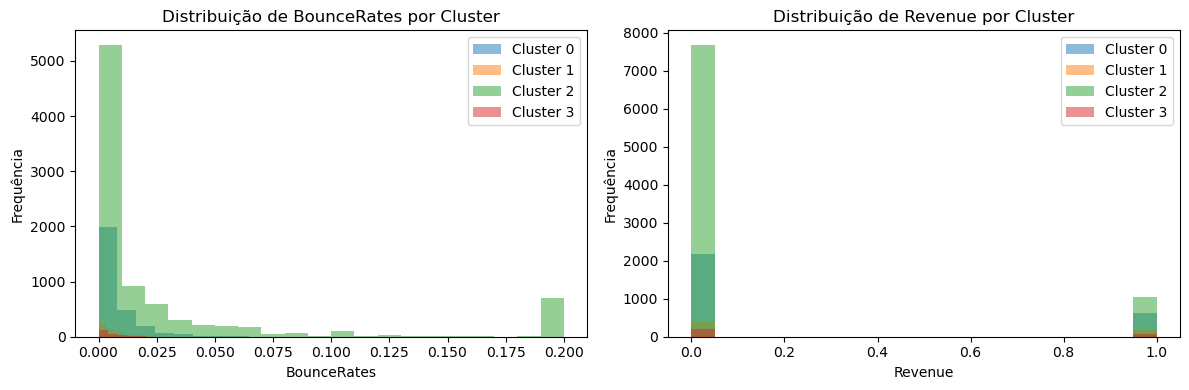


O cluster 1 possui a maior média de Revenue, indicando maior propensão à compra.
CPU times: total: 391 ms
Wall time: 548 ms


In [9]:
%%time
# Converter a coluna 'Revenue' para tipo numérico
df['Revenue'] = df['Revenue'].astype(int)

# Estatísticas descritivas para BounceRates e Revenue por cluster
print('Estatísticas descritivas para BounceRates e Revenue por cluster:')
table = PrettyTable()
table.field_names = ['Cluster', 'Variable', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
for cluster in range(4):
    for var in ['BounceRates', 'Revenue']:
        desc = df[df['Cluster'] == cluster][var].describe()
        row_data = [cluster, var] + [f"{val:.2f}" if not pd.isna(val) else 'NaN' for val in desc]
        table.add_row(row_data)
print(table)

# Plotar a distribuição de BounceRates e Revenue por cluster
plt.figure(figsize=(12, 4))
for i, var in enumerate(['BounceRates', 'Revenue']):
    plt.subplot(1, 2, i+1)
    for cluster in range(4):
        data = df[df['Cluster'] == cluster][var].dropna()
        plt.hist(data, bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribuição de {var} por Cluster')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()

# Identificar o cluster com maior propensão à compra
cluster_revenue = df.groupby('Cluster')['Revenue'].mean()
best_cluster = cluster_revenue.idxmax()
print(f'\nO cluster {best_cluster} possui a maior média de Revenue, indicando maior propensão à compra.')